In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-11 18:46:26.990976: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='GENERAL_ELC'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end)
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200,APPLE
2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249969,50133100,APPLE
2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680969,68445600,APPLE
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500,APPLE
2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...
2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200,APPLE
1,2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249969,50133100,APPLE
2,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680969,68445600,APPLE
3,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500,APPLE
4,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...,...
2525,2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2526,2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2527,2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC
2528,2024-04-10,151.889999,157.789993,151.649994,156.610001,156.610001,8075400,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200,APPLE
2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249969,50133100,APPLE
2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680969,68445600,APPLE
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500,APPLE
2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...
2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2164

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.53397869],
       [-0.53623747],
       [-0.51861891],
       ...,
       [-0.55434008],
       [-0.54749918],
       [-0.54404648]])

In [16]:
train_set, test_set = scaled_data[:training_data_len], scaled_data[training_data_len:]

In [17]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,215.479996,216.020004,213.410004,213.850006,213.623352,16710100,META
2023-04-12,214.839996,216.839996,212.580002,214.000000,213.773178,18972200,META
2023-04-13,215.729996,221.149994,215.690002,220.350006,220.116455,23310400,META
2023-04-14,217.880005,222.110001,217.550003,221.490005,221.255249,21591200,META
2023-04-17,219.789993,220.979996,217.130005,218.860001,218.628036,15481900,META
...,...,...,...,...,...,...,...
2024-04-05,516.859985,530.700012,514.409973,527.340027,527.340027,19242000,META
2024-04-08,529.280029,531.489990,518.890015,519.250000,519.250000,13260600,META
2024-04-09,522.229980,525.869995,506.739990,516.900024,516.900024,10881400,META


In [18]:
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction

In [20]:
residuals.shape

(113, 113)

In [21]:
X_train = residuals[:-1].reshape(-1, 1)  
y_train = residuals[1:].reshape(-1, 1) 

In [22]:
X_train

array([[0.00876387],
       [0.00883121],
       [0.00874847],
       ...,
       [0.23134369],
       [0.23134369],
       [0.23134369]])

In [23]:
y_train.shape

(12656, 1)

In [24]:
ann_model = Sequential()
ann_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [25]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = ann_model.fit(X_train, y_train, batch_size=1, epochs=1)

12656/12656 [==============================] - 8s 603us/step - loss: 4.1646e-05


In [27]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [28]:
dataset

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [29]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Date,
2023-10-30,87.637672
2023-10-31,86.695930
2023-11-01,85.594574
2023-11-02,86.017555
2023-11-03,86.927376
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [30]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [31]:
x_test = np.array(x_test)

In [32]:
x_test

array([[-0.76169265, -0.7573919 , -0.76043076, ..., -0.7664827 ,
        -0.77266342, -0.7789729 ],
       [-0.7573919 , -0.76043076, -0.76398467, ..., -0.77266342,
        -0.7789729 , -0.77006236],
       [-0.76043076, -0.76398467, -0.76037926, ..., -0.7789729 ,
        -0.77006236, -0.77310122],
       ...,
       [-0.71850491, -0.71860794, -0.72329499, ..., -0.57725072,
        -0.5484995 , -0.54778959],
       [-0.71860794, -0.72329499, -0.72610206, ..., -0.5484995 ,
        -0.54778959, -0.55434008],
       [-0.72329499, -0.72610206, -0.72180131, ..., -0.54778959,
        -0.55434008, -0.54749918]])

In [33]:
x_test_mean_array = []
for sub in x_test:
    x_test_mean = np.mean(sub)
    x_test_mean_array.append(x_test_mean)

In [34]:
predictions = ann_model.predict(x_test_mean_array)
predictions

4/4 [==============================] - 0s 937us/step


array([[-0.49982038],
       [-0.49991307],
       [-0.5000869 ],
       [-0.50026655],
       [-0.5003917 ],
       [-0.5005242 ],
       [-0.50060457],
       [-0.5007115 ],
       [-0.5007115 ],
       [-0.5007251 ],
       [-0.5006023 ],
       [-0.500496  ],
       [-0.5003469 ],
       [-0.5002147 ],
       [-0.50005877],
       [-0.4998053 ],
       [-0.4995745 ],
       [-0.49940547],
       [-0.49928376],
       [-0.49912247],
       [-0.49896535],
       [-0.49883404],
       [-0.49866363],
       [-0.49840364],
       [-0.4980984 ],
       [-0.49781874],
       [-0.49764857],
       [-0.49751154],
       [-0.49734393],
       [-0.49720314],
       [-0.4970666 ],
       [-0.49690267],
       [-0.49676105],
       [-0.49657586],
       [-0.49628398],
       [-0.49593082],
       [-0.49552557],
       [-0.49514243],
       [-0.49468413],
       [-0.49427512],
       [-0.49379286],
       [-0.4932396 ],
       [-0.4926537 ],
       [-0.4921184 ],
       [-0.49162734],
       [-0

In [35]:
len(predictions)

113

In [36]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [37]:
predictions = scaler.inverse_transform(predictions)

In [38]:
mse = np.mean(predictions -f_app)
mse

-56.61738681314209

In [39]:
predictions

array([[171.38567],
       [171.35693],
       [171.30305],
       [171.24739],
       [171.20859],
       [171.16753],
       [171.14264],
       [171.1095 ],
       [171.1095 ],
       [171.10529],
       [171.14334],
       [171.17628],
       [171.22249],
       [171.26346],
       [171.31178],
       [171.39034],
       [171.46185],
       [171.51424],
       [171.55196],
       [171.60194],
       [171.65063],
       [171.69133],
       [171.74414],
       [171.8247 ],
       [171.9193 ],
       [172.00597],
       [172.0587 ],
       [172.10117],
       [172.15312],
       [172.19675],
       [172.23906],
       [172.28986],
       [172.33374],
       [172.39114],
       [172.4816 ],
       [172.59103],
       [172.71663],
       [172.83536],
       [172.97739],
       [173.10414],
       [173.25359],
       [173.42505],
       [173.60661],
       [173.7725 ],
       [173.92468],
       [174.03587],
       [174.1631 ],
       [174.29388],
       [174.42656],
       [174.58069],


In [40]:
import random
random.random()

0.4935706075353289

In [41]:
Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [42]:
Final_pred

array([[147.36996],
       [147.34123],
       [147.28735],
       [147.23169],
       [147.19289],
       [147.15182],
       [147.12694],
       [147.0938 ],
       [147.0938 ],
       [147.08958],
       [147.12764],
       [147.16058],
       [147.20679],
       [147.24776],
       [147.29608],
       [147.37463],
       [147.44615],
       [147.49854],
       [147.53625],
       [147.58624],
       [147.63493],
       [147.67563],
       [147.72844],
       [147.809  ],
       [147.9036 ],
       [147.99026],
       [148.043  ],
       [148.08546],
       [148.13742],
       [148.18105],
       [148.22336],
       [148.27415],
       [148.31804],
       [148.37544],
       [148.4659 ],
       [148.57533],
       [148.70093],
       [148.81966],
       [148.96169],
       [149.08844],
       [149.23788],
       [149.40935],
       [149.59091],
       [149.7568 ],
       [149.90898],
       [150.02017],
       [150.1474 ],
       [150.27818],
       [150.41086],
       [150.56499],


In [43]:
train = df_rest
data = df_app['Close'].values
len(data)

253

In [44]:
len(data[138:252])

114

In [45]:
valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
valid['Predictions'] = Final_pred

In [46]:
valid

,Close_app,Predictions
0,213.850006,147.369965
1,214.000000,147.341232
2,220.350006,147.287354
3,221.490005,147.231689
4,218.860001,147.192886
...,...,...
108,311.720001,168.335342
109,300.309998,168.927704
110,302.549988,169.514389
111,305.070007,170.077393


In [47]:
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200,APPLE
1,2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249969,50133100,APPLE
2,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680969,68445600,APPLE
3,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500,APPLE
4,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,APPLE
...,...,...,...,...,...,...,...,...
2525,2024-04-05,148.529999,156.470001,148.529999,156.300003,156.300003,14768500,GENERAL_ELC
2526,2024-04-08,157.470001,157.949997,153.699997,156.520004,156.520004,9588800,GENERAL_ELC
2527,2024-04-09,156.130005,157.869995,150.929993,154.490005,154.490005,8808800,GENERAL_ELC
2528,2024-04-10,151.889999,157.789993,151.649994,156.610001,156.610001,8075400,GENERAL_ELC


In [48]:
dfxfs = dfxf[['Date', 'Close']]
dfxfs

,Date,Close
0,2023-04-11,160.800003
1,2023-04-12,160.100006
2,2023-04-13,165.559998
3,2023-04-14,165.210007
4,2023-04-17,165.229996
...,...,...
2525,2024-04-05,156.300003
2526,2024-04-08,156.520004
2527,2024-04-09,154.490005
2528,2024-04-10,156.610001


In [49]:
dfxf['Date']

0       2023-04-11
1       2023-04-12
2       2023-04-13
3       2023-04-14
4       2023-04-17
           ...    
2525    2024-04-05
2526    2024-04-08
2527    2024-04-09
2528    2024-04-10
2529    2024-04-11
Name: Date, Length: 2530, dtype: object

In [50]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [51]:
    dfxfs.index = dfxfs.pop('Date')
    dfxfs

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [52]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

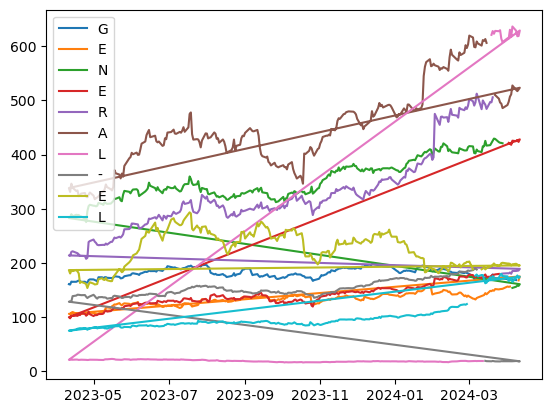

In [53]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [54]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-11,215.479996,216.020004,213.410004,213.850006,213.623352,16710100,META
2023-04-12,214.839996,216.839996,212.580002,214.000000,213.773178,18972200,META
2023-04-13,215.729996,221.149994,215.690002,220.350006,220.116455,23310400,META
2023-04-14,217.880005,222.110001,217.550003,221.490005,221.255249,21591200,META
2023-04-17,219.789993,220.979996,217.130005,218.860001,218.628036,15481900,META
...,...,...,...,...,...,...,...
2024-04-05,516.859985,530.700012,514.409973,527.340027,527.340027,19242000,META
2024-04-08,529.280029,531.489990,518.890015,519.250000,519.250000,13260600,META
2024-04-09,522.229980,525.869995,506.739990,516.900024,516.900024,10881400,META


In [55]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [56]:
    df_app_c

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [57]:
    dfxfs

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [58]:
    df_g = df_app_c
    df_g

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [59]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [60]:
dfxfs

,Close
Date,
2023-04-11,160.800003
2023-04-12,160.100006
2023-04-13,165.559998
2023-04-14,165.210007
2023-04-17,165.229996
...,...
2024-04-05,156.300003
2024-04-08,156.520004
2024-04-09,154.490005


In [61]:
df_mse_a

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [62]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index

In [63]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index
val = dfxfs_values - df_mse_a_values

values = {'Close': val}
mseallf = pd.DataFrame(values, index=index_dfxfs)


In [64]:
    mseallf

,Close
Date,
2023-04-11,-53.050003
2023-04-12,-53.899994
2023-04-13,-54.790009
2023-04-14,-56.279999
2023-04-17,-53.630005
...,...
2024-04-05,-371.040024
2024-04-08,-362.729996
2024-04-09,-362.410019


In [65]:
for i in range(1,len(dfxfs)):
    if (mseallf.iloc[i,0]>=0):
        final_df = dfxfs+mseallf
    else:
        final_df = dfxfs-mseallf
final_df

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [66]:
sdx = final_df[251:2500]
sdx

,Close
Date,
2024-04-10,519.830017
2024-04-11,523.159973
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
...,...
2024-02-22,486.130005
2024-02-23,484.029999
2024-02-26,481.739990


In [67]:
datasetx = final_df.iloc[251:2500]

In [68]:
training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
training_data_lenx

2137

In [69]:
datasetx

,Close
Date,
2024-04-10,519.830017
2024-04-11,523.159973
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
...,...
2024-02-22,486.130005
2024-02-23,484.029999
2024-02-26,481.739990


In [70]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_datax = scaler.fit_transform(datasetx)
scaled_datax

array([[ 0.95303162],
       [ 0.97385751],
       [-0.96059913],
       ...,
       [ 0.71481264],
       [ 0.74802191],
       [ 0.72907199]])

In [71]:
train_datax = scaled_datax[0:int(training_data_lenx), :]

In [72]:
x_trainx = []
y_trainx = []

In [73]:
for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])

In [74]:
x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

In [75]:
x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))

In [76]:
len(x_trainx)

2077

In [77]:
sdx

,Close
Date,
2024-04-10,519.830017
2024-04-11,523.159973
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
...,...
2024-02-22,486.130005
2024-02-23,484.029999
2024-02-26,481.739990


In [78]:
x_trainx.shape[0]

2077

In [79]:
xtrainfinal = np.array(sdx)
xtrainfinal.shape[1]

1

In [80]:
xtrainfinal.shape[0]

2249

In [81]:
train_set, test_set = scaled_datax[:training_data_lenx], scaled_datax[training_data_lenx:]
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction
x_trainx = residuals[:-1].reshape(-1, 1)  
y_trainx = residuals[1:].reshape(-1, 1) 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/sridhar/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
ann_modelx = Sequential()
ann_modelx.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_modelx.add(Dense(1))
ann_modelx.compile(loss='mean_squared_error', optimizer='adam')
ann_modelx.fit(x_trainx, y_trainx, epochs=100, batch_size=10, verbose=0)

In [83]:
ann_modelx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [84]:
historyx = ann_modelx.fit(x_trainx, y_trainx, batch_size=2, epochs=1)

6216/6216 [==============================] - 4s 608us/step - loss: 0.0034


In [85]:
test_datax = scaled_datax[training_data_lenx - 60: , :]
x_testx = []

In [86]:
y_testx = datasetx[training_data_lenx:len(datasetx)]
y_testx

,Close
Date,
2023-09-19,305.070007
2023-09-20,299.670013
2023-09-21,295.730011
2023-09-22,299.079987
2023-09-25,300.829987
...,...
2024-02-22,486.130005
2024-02-23,484.029999
2024-02-26,481.739990


In [87]:
for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])

In [88]:
x_testx = np.array(x_testx)

In [89]:
x_testx

array([[-0.4922918 , -0.55645897, -0.50279884, ..., -0.34851002,
        -0.41986937, -0.40586024],
       [-0.55645897, -0.50279884, -0.51380594, ..., -0.41986937,
        -0.40586024, -0.39009977],
       [-0.50279884, -0.51380594, -0.53732143, ..., -0.40586024,
        -0.39009977, -0.42387189],
       ...,
       [-0.17796068, -0.22042591, -0.25200924, ...,  0.62906893,
         0.74226825,  0.72913459],
       [-0.22042591, -0.25200924, -0.26658122, ...,  0.74226825,
         0.72913459,  0.71481264],
       [-0.25200924, -0.26658122, -0.29660103, ...,  0.72913459,
         0.71481264,  0.74802191]])

In [90]:
x_test_mean_arrayx = []
for sub in x_testx:
    x_test_mean = np.mean(sub)
    x_test_mean_arrayx.append(x_test_mean)

In [91]:
predictionsx = ann_modelx.predict(x_test_mean_arrayx)
predictionsx

4/4 [==============================] - 0s 1ms/step


array([[-0.04589388],
       [-0.04649141],
       [-0.04726657],
       [-0.04758409],
       [-0.04808834],
       [-0.04879406],
       [-0.04923221],
       [-0.04966083],
       [-0.05001155],
       [-0.0503121 ],
       [-0.05090785],
       [-0.05115798],
       [-0.05142453],
       [-0.05125812],
       [-0.05133203],
       [-0.05167902],
       [-0.05208942],
       [-0.05266616],
       [-0.05296412],
       [-0.05340913],
       [-0.05439249],
       [-0.05557698],
       [-0.05639979],
       [-0.0569205 ],
       [-0.05680862],
       [-0.05638918],
       [-0.05616787],
       [-0.05532026],
       [-0.05437097],
       [-0.05376902],
       [-0.05347392],
       [-0.05291483],
       [-0.05288586],
       [-0.05309281],
       [-0.05341682],
       [-0.05393466],
       [-0.05439654],
       [-0.05504856],
       [-0.05600882],
       [-0.05760613],
       [-0.05928621],
       [-0.06098333],
       [-0.06263295],
       [-0.06409386],
       [-0.06585988],
       [-0

In [92]:
predictionsx = scaler.inverse_transform(predictionsx)

In [93]:
predictionsx

array([[360.1068 ],
       [360.01126],
       [359.88733],
       [359.83655],
       [359.75592],
       [359.6431 ],
       [359.57303],
       [359.50452],
       [359.44843],
       [359.40036],
       [359.30508],
       [359.2651 ],
       [359.22247],
       [359.24908],
       [359.23727],
       [359.1818 ],
       [359.11615],
       [359.02396],
       [358.97632],
       [358.90515],
       [358.74796],
       [358.55856],
       [358.42694],
       [358.3437 ],
       [358.3616 ],
       [358.42868],
       [358.46405],
       [358.59958],
       [358.75137],
       [358.84763],
       [358.89478],
       [358.9842 ],
       [358.98883],
       [358.95575],
       [358.90393],
       [358.82114],
       [358.74728],
       [358.64304],
       [358.48947],
       [358.2341 ],
       [357.96545],
       [357.6941 ],
       [357.43033],
       [357.19672],
       [356.91434],
       [356.59586],
       [356.32266],
       [356.0683 ],
       [355.81613],
       [355.5892 ],


In [94]:
data = final_df['Close']

In [95]:
len(data)

2530

In [96]:
data

Date
2023-04-11    213.850006
2023-04-12    214.000000
2023-04-13    220.350006
2023-04-14    221.490005
2023-04-17    218.860001
                 ...    
2024-04-05    527.340027
2024-04-08    519.250000
2024-04-09    516.900024
2024-04-10    519.830017
2024-04-11    523.159973
Name: Close, Length: 2530, dtype: float64

In [97]:
datax = pd.DataFrame(data)
datax

,Close
Date,
2023-04-11,213.850006
2023-04-12,214.000000
2023-04-13,220.350006
2023-04-14,221.490005
2023-04-17,218.860001
...,...
2024-04-05,527.340027
2024-04-08,519.250000
2024-04-09,516.900024


In [98]:
datax.iloc[1:113,0]

Date
2023-04-12    214.000000
2023-04-13    220.350006
2023-04-14    221.490005
2023-04-17    218.860001
2023-04-18    217.889999
                 ...    
2023-09-14    311.720001
2023-09-15    300.309998
2023-09-18    302.549988
2023-09-19    305.070007
2023-09-20    299.670013
Name: Close, Length: 112, dtype: float64

In [99]:
import random as rand

final_pred = np.zeros(len(predictionsx))
for i in range (0, len(predictionsx)):
    if i<=50:
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)-(predictionsx[i]*rand.random()/1050)-1.5*(predictionsx[i]*rand.random())/100)
    elif(i>50 & i<90):
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)+(predictionsx[i]*2*rand.random()/150)+1.85*(predictionsx[i]*rand.random())/1500)
    else:
        final_pred[i] = predictionsx[i]+((predictionsx[i]*rand.random()/4)+(predictionsx[i]*2*rand.random()/150)+0.85*(predictionsx[i]*rand.random())/1500)
final_pred

array([360.22937012, 354.61517334, 355.09072876, 356.52398682,
       361.59359741, 359.23342896, 354.87451172, 355.35275269,
       358.19616699, 361.32461548, 354.40289307, 361.84384155,
       360.81143188, 362.32217407, 353.59078979, 358.53936768,
       353.46228027, 362.17532349, 353.21881104, 351.94293213,
       352.10534668, 357.33703613, 359.72283936, 350.87203979,
       358.73071289, 353.3578186 , 360.79879761, 355.418396  ,
       358.70809937, 353.99682617, 357.81225586, 358.93927002,
       358.90127563, 355.71585083, 360.19021606, 354.27597046,
       357.47729492, 357.11135864, 353.80157471, 352.95504761,
       358.76571655, 353.23846436, 356.24523926, 352.54394531,
       356.19482422, 356.29556274, 355.36331177, 355.50430298,
       354.50473022, 358.27349854, 355.75811768, 349.82455444,
       353.80203247, 350.49905396, 347.12817383, 347.8979187 ,
       345.69338989, 348.31607056, 345.59918213, 345.3314209 ,
       348.56619263, 348.09402466, 345.36129761, 343.70

In [100]:
valid = pd.DataFrame()

In [101]:
valid

""


In [102]:
np.array(data)

array([213.8500061 , 214.        , 220.3500061 , ..., 516.90002441,
       519.83001709, 523.15997314])

In [103]:
valid = pd.DataFrame(final_pred,columns=['predictions'])

In [104]:
valid['close app'] = np.array(data[101:213])

In [105]:
valid

,predictions,close app
0,360.229370,300.149994
1,354.615173,299.170013
2,355.090729,298.670013
3,356.523987,297.890015
4,361.593597,307.559998
...,...,...
107,375.041321,469.589996
108,374.689789,470.000000
109,378.347168,468.109985
110,380.926208,468.899994


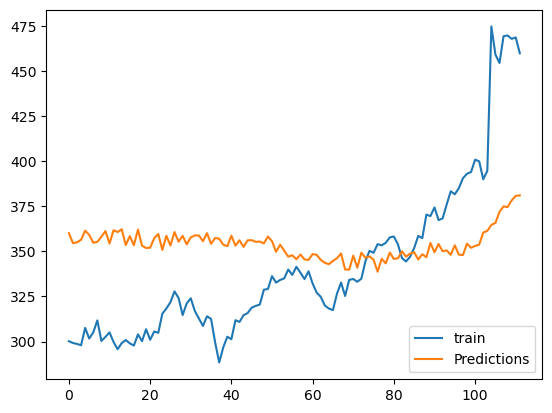

In [106]:
plt.figure()
plt.plot(datax['Close'][101:213].values)
plt.plot(valid[['predictions']])
plt.legend(['train', 'Predictions'], loc='lower right')
plt.show()

In [107]:
error_main = np.sqrt(np.abs(datax['Close'][101:213].values -valid[['predictions']].values))
print(error_main)

[[ 7.75108871  7.81404867  7.8459771  ... 10.38655935 10.42452031
   9.99452975]
 [ 7.38005281  7.44615068  7.47964972 ... 10.65339439 10.69040788
  10.27155401]
 [ 7.41220176  7.47801547  7.5113724  ... 10.63105153 10.66814253
  10.24837872]
 ...
 [ 8.8429166   8.89815456  8.92620606 ...  9.47432411  9.51592486
   9.04283292]
 [ 8.98755888  9.04191324  9.06952011 ...  9.33722533  9.37943417
   8.89908909]
 [ 9.00192579  9.05619393  9.0837574  ...  9.32337511  9.36564638
   8.88455588]]


In [110]:
error_main.shape

(112, 112)

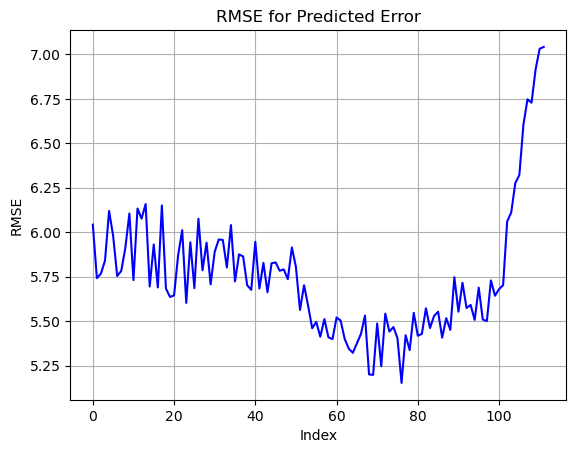

In [111]:
error = np.mean(error_main, axis=1)
plt.plot(np.arange(112), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [112]:
final_pred

array([360.22937012, 354.61517334, 355.09072876, 356.52398682,
       361.59359741, 359.23342896, 354.87451172, 355.35275269,
       358.19616699, 361.32461548, 354.40289307, 361.84384155,
       360.81143188, 362.32217407, 353.59078979, 358.53936768,
       353.46228027, 362.17532349, 353.21881104, 351.94293213,
       352.10534668, 357.33703613, 359.72283936, 350.87203979,
       358.73071289, 353.3578186 , 360.79879761, 355.418396  ,
       358.70809937, 353.99682617, 357.81225586, 358.93927002,
       358.90127563, 355.71585083, 360.19021606, 354.27597046,
       357.47729492, 357.11135864, 353.80157471, 352.95504761,
       358.76571655, 353.23846436, 356.24523926, 352.54394531,
       356.19482422, 356.29556274, 355.36331177, 355.50430298,
       354.50473022, 358.27349854, 355.75811768, 349.82455444,
       353.80203247, 350.49905396, 347.12817383, 347.8979187 ,
       345.69338989, 348.31607056, 345.59918213, 345.3314209 ,
       348.56619263, 348.09402466, 345.36129761, 343.70